In [20]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder

from model import DecisionTree as DecisionTree

In [21]:
# Import data
df = pd.read_csv('data.csv')
df.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
df['Purchase'].value_counts()

Yes    24
No      6
Name: Purchase, dtype: int64

In [4]:
df = df.values

In [5]:
# Perform label encoding
label_encoder = LabelEncoder()
df = label_encoder.fit_transform(df.ravel()).reshape(df.shape)

In [17]:
print(df.flatten())

[0 1 1 1 0 1 1 1 0 0 0 0 2 1 1 1 2 1 1 1 2 0 0 0 2 1 0 1 0 1 1 1 2 1 1 1 2
 1 1 1 2 0 1 1 2 0 0 0 2 1 1 1 2 1 1 1 2 1 1 1 0 1 1 1 2 0 1 1 0 1 0 1 2 0
 0 1 2 0 1 1 0 1 1 1 2 1 1 0 2 0 1 1 0 1 1 1 2 0 0 0 0 0 1 0 0 1 1 1 0 1 1
 1 2 1 1 1 2 1 1 1]


In [7]:
# Create X(input feature) and y(label) from data
y = df[:, -1].reshape(-1, 1)
X = df[:, :-1]

In [22]:
df['Classification'] = df['Classification'] - 1
y = df['Classification'].values.reshape(-1, 1)
X = df.drop(columns='Classification').values

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.15)

In [26]:
print(y_train.shape)

(98, 1)


In [27]:
model = DecisionTree()
model.fit(X_train, y_train)

In [28]:
# Prediction
y_pred = model.predict(X_test)
print(y_pred)

[[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]


In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6 1]
 [2 9]]


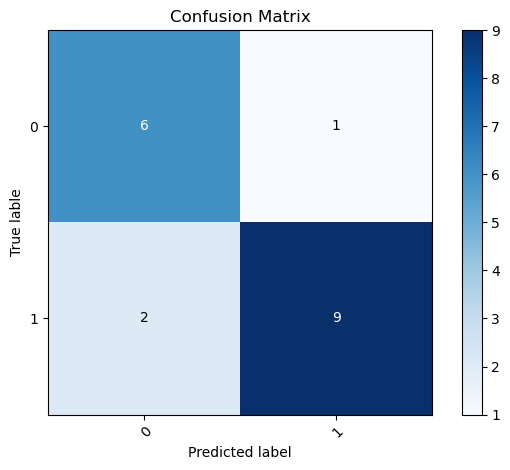

In [30]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Customize the plot
ax.figure.colorbar(im, ax=ax)
classes = np.unique(y_test)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True lable',
       xlabel='Predicted label')

# Rotate the x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha='center', va='center',
                color='white' if cm[i, j] > thresh else 'black')

# Display the plot
plt.tight_layout()
plt.show()

In [30]:
print(cm.max())

10
